In [2]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library
import numpy.random as rn
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # Import the Regressor
#[x for x in dir(list) if not '__' in x]

### Import Data Frame assign the name fifa
* Print out the head() or first 5 rows

In [17]:
fifa = pa.read_csv('https://www.dropbox.com/s/ov362sryogd0942/CompleteDataset.csv?dl=1', low_memory=False)

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Position
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,89,63,...,83,94,23,91,92,31,80,85,88,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,92,48,...,88,85,26,87,73,28,59,90,85,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,94,56,...,81,80,33,90,78,24,53,80,83,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,88,78,...,83,87,38,77,89,45,80,84,88,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,58,29,...,55,25,11,61,44,10,83,70,11,GK


### Fixing Bad Data
* Stripped "€" and "K" from Wage
* Stripped "+" and "-" from the front of the columns
* Removed any part of the String after "+" and "-" and convert columns to float

In [18]:
fifa['Wage'] = fifa['Wage'].map(lambda x: x.lstrip('€').rstrip('K'))

In [19]:
A = fifa["Age"] = fifa.Age.astype(float)
B = fifa["Overall"] = fifa.Overall.astype(float)
C = fifa["Wage"] = fifa.Wage.astype(float)
D = fifa["Potential"] = fifa.Potential.astype(float)

In [20]:
def removeStrings (X):
    if '+' in X:
        K = X.find('+')
        return X[:K]
    if '-' in X:
        K = X.find('-')
        return X[:K]
    else:  
        return X

In [21]:
def convertFloat(fifa, feature):
    for K in fifa.index: 
        fifa.loc[K,feature] = removeStrings(fifa.loc[K, feature])

    
    fifa.loc[:, feature] = fifa.loc[:,feature].astype("float")  
    return fifa

In [22]:
fifa = convertFloat(fifa, "Acceleration")
fifa = convertFloat(fifa, "Aggression")
fifa = convertFloat(fifa, "Agility")
fifa = convertFloat(fifa, "Balance")
fifa = convertFloat(fifa, "Ball control")

### Avalaible Columns
* Age, Overall, Potentail, Wage, Acceleration, Aggression, Agility, Balance, and Ball Control

Name                   object
Age                   float64
Nationality            object
Overall               float64
Potential             float64
Club                   object
Value                  object
Wage                  float64
Acceleration          float64
Aggression            float64
Agility               float64
Balance               float64
Ball control          float64
Composure              object
Crossing               object
Curve                  object
Dribbling              object
Finishing              object
Free kick accuracy     object
GK diving              object
GK handling            object
GK kicking             object
GK positioning         object
GK reflexes            object
Heading accuracy       object
Interceptions          object
Jumping                object
Long passing           object
Long shots             object
Marking                object
Penalties              object
Positioning            object
Reactions              object
Short pass

### K- nearest neighbors

In [68]:
X = np.array(fifa[['Ball control', 'Overall']])
y = np.array(fifa.iloc[:, 7])

In [69]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [70]:
 # Make the training and testing sets
n = X.shape[0]
test = int(0.30*n)            # We will use a test set made up of 30% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

In [71]:
from sklearn.neighbors import KNeighborsRegressor # Import the Regressor

In [72]:
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors

def plot_reg_model(reg, X_train, y_train, X_test, y_test):
    
    h = 0.01 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.6715942728489941
Testing R2: 0.6144627879331559


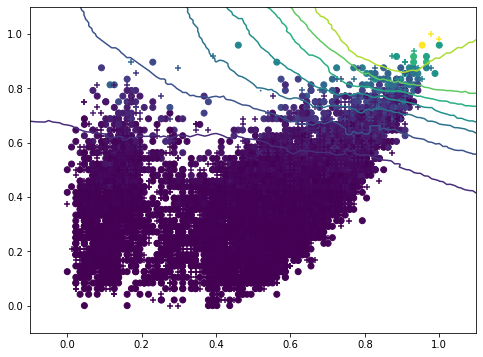

In [73]:
reg = KNeighborsRegressor(n_neighbors=100)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

In [74]:
X = np.array(fifa[['Ball control', 'Agility']])
y = np.array(fifa.iloc[:, 3])

In [75]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - min(X[:, l]))/(max(X[:, l]) - min(X[:, l]))

In [76]:
 # Make the training and testing sets
n = X.shape[0]
test = int(0.30*n)            # We will use a test set made up of 30% of the data from our sample
perm = rn.permutation(n)   
X = X[perm]
y = y[perm]
X_test = X[:test]       # Then create the test
y_test = y[:test]
X_train = X[test:]     # and train sets
y_train = y[test:]

Training R2: 0.5428764460317256
Testing R2: 0.511481697279566


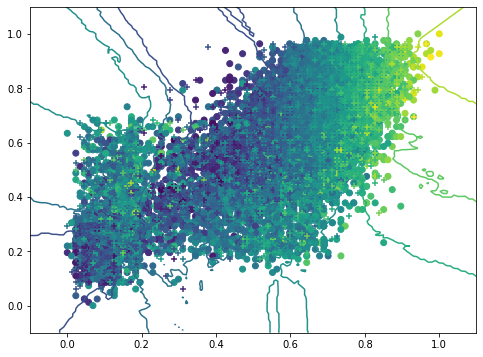

In [78]:
reg = KNeighborsRegressor(n_neighbors=25)
reg.fit(X_train, y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)

### PCA Model

In [91]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as pltco # A package to help with coloring plots
# Build a matrix of the predictors and results
X = np.array(fifa.iloc[:,7:12])
y = np.array(fifa.iloc[:, 1])

In [92]:
pca = PCA(n_components=2) # Use PCA to identify the two most important components

# component here means a linear combination of the features

Xpca = pca.fit_transform(X);

In [93]:
# The explained variance quantifies the propotion of the variation in the values of X that have been explained by each component

print(pca.explained_variance_ratio_)

[0.44837437 0.30778673]


In [94]:
# We shuffle the data using a random permutation
import numpy.random as rn
n = X.shape[0]
test = int(0.25*n)            # We will use a test set made up of 20% of the data from our sample
perm = rn.permutation(n)   
Xpca= Xpca[perm]
y = y[perm]
X_test = Xpca[:test]       # Then create the test
y_test = y[:test]
X_train = Xpca[test:]     # and train sets
y_train = y[test:]

In [95]:
cat1 = LogisticRegression(solver='liblinear', multi_class='auto').fit(X_train[:, 0:2], y_train)
cat1.score(X_train[:, 0:2], y_train), cat1.score(X_test[:, 0:2], y_test)

(0.1050719264422364, 0.10634037819799777)

In [96]:
def plot_reg_model(reg, X_train, y_train, X_test, y_test):

    h = 0.01 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = -40.0, 40.0
    y_min, y_max = -20.0, 20.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training R2: {}'.format(reg.score(X_train, y_train)))
    print('Testing R2: {}'.format(reg.score(X_test, y_test)))

Training R2: 0.03903605552387346
Testing R2: 0.04591111825280558


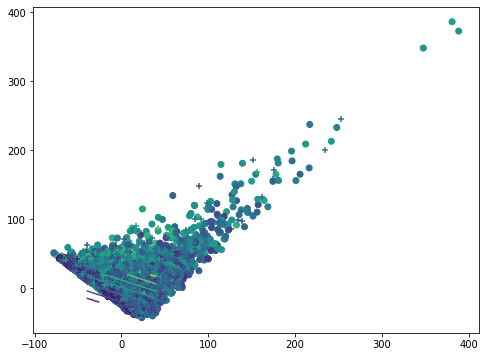

In [97]:
reg = LinearRegression()
reg.fit(X_train,y_train)
plot_reg_model(reg, X_train, y_train, X_test, y_test)